In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpld3
from mpld3 import plugins
import pandas as pd
from scipy import stats
from datetime import datetime
import copy
%matplotlib inline
mpld3.enable_notebook()


In [2]:
#John Jay,1745,1829,84
data = pd.read_csv('scotus.csv', names=['name', 'born', 'died', 'lifespan'])
good_indices = np.where(data['lifespan'] == data['lifespan'])[0]
dates = [datetime(year, 1, 1) for year in data['born']]
lifespans = copy.deepcopy(data['lifespan'])
lifespans[lifespans != lifespans] = 2016 - data['born'][lifespans != lifespans] 

(0.33753534073286312, 0.0004889914696899287)
0.124368019757


/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


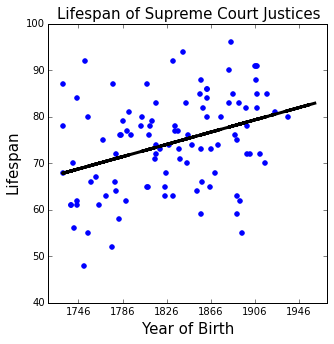

In [3]:
fig, axis = plt.subplots(1, figsize=(5, 5))
print stats.spearmanr(data['born'][good_indices], data['lifespan'][good_indices])
slope, intercept, rvalue, pvalue, stderr = stats.linregress(data['born'][good_indices],
                                                            data['lifespan'][good_indices])
print rvalue**2
axis.plot(dates, data['born']*slope+intercept, color='black', linewidth='3')
points = axis.scatter(dates, data['lifespan'], color='b')
axis.set_ylabel('Lifespan', fontsize=15)
axis.set_xlabel('Year of Birth', fontsize=15)

labels = ["{:s}".format(i) for i in data['name'][good_indices]]
tooltip = plugins.PointLabelTooltip(points, labels)
axis.set_title("Lifespan of Supreme Court Justices", fontsize=15)

plugins.connect(fig, tooltip)

0.0634957265535


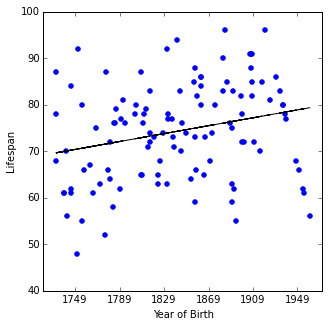

In [4]:
fig, axis = plt.subplots(1, figsize=(5, 5))
stats.spearmanr(data['born'], lifespans)
slope, intercept, rvalue, pvalue, stderr = stats.linregress(data['born'],
                                                            lifespans)
print rvalue**2
points = axis.scatter(dates, lifespans, color='b')
axis.plot(dates, data['born']*slope+intercept, color='black')
axis.set_ylabel('Lifespan')
axis.set_xlabel('Year of Birth')

labels = ["{:s}".format(i) for i in data['name']]
tooltip = plugins.PointLabelTooltip(points, labels)

plugins.connect(fig, tooltip)